# TASK 4P - COMPUTER VISION
* **Name** : M.Rachel
* **Student No.** :224234147
* **Deakin Mail** :s224234147@deakin.edu.au
* **Email Address**: *rachelriney1608@gmail.com*

**Azure Computer Vision** is a cognitive service that helps to analyze images and get detailed information about them using pre-trained computer vision capabilities.

## INSTALLING NECESSARY LIBRARIES 

* To access *computer vision services* at **Azure**.
* **Pillow library** has a basic *Image Processing functionality* which helps to *image resizing, transformation, convert image to grayscale, change image formats*.
* **Python dotenv** is a module for *managing environment variables*, separating configuration from code to enhance security and flexibility.

In [1]:
#Computer Vision
!pip install --upgrade azure-cognitiveservices-vision-computervision

# Pillow library:
!pip install pillow

# dotenv library
!pip install python-dotenv

## Importing the Libraries

In [2]:
# To display the images
from IPython.display import Image as img

In [3]:
# To run the Azure Computer Vision Service
from azure.cognitiveservices.vision.computervision import ComputerVisionClient

# To extract specific features from the image
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

# To authenticate the client
from msrest.authentication import CognitiveServicesCredentials

# To draw bounding boxes in images
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# To read the secret keys for Authentication
import os
from dotenv import load_dotenv

## CREATE COMPUTER VISION RESOURCE 

**CREATE NEW RESOURCE GROUP IN MICROSOFT AZURE**

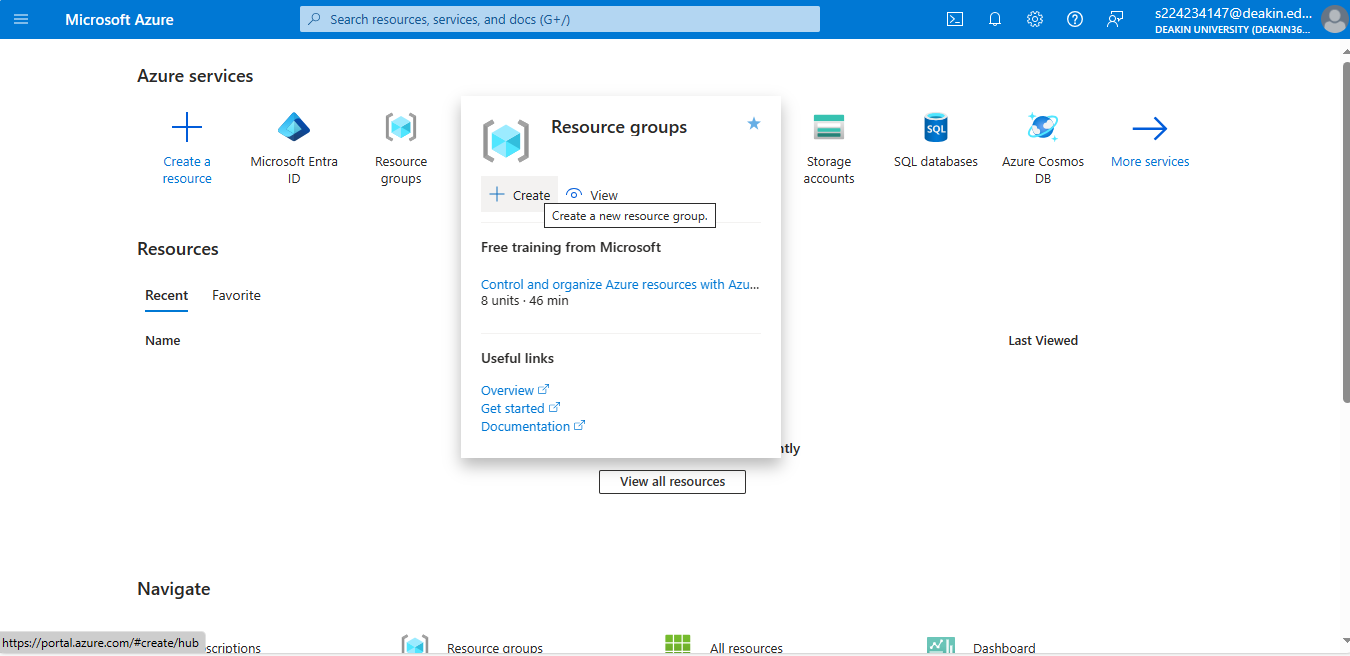

* **CREATING RESOURCE GROUP NAME AS *"Task-4p_Rachel"***
* Select **Region** as *(US) East US*
* Select *Review+create* forwarding to validation process and creating the Resource Group

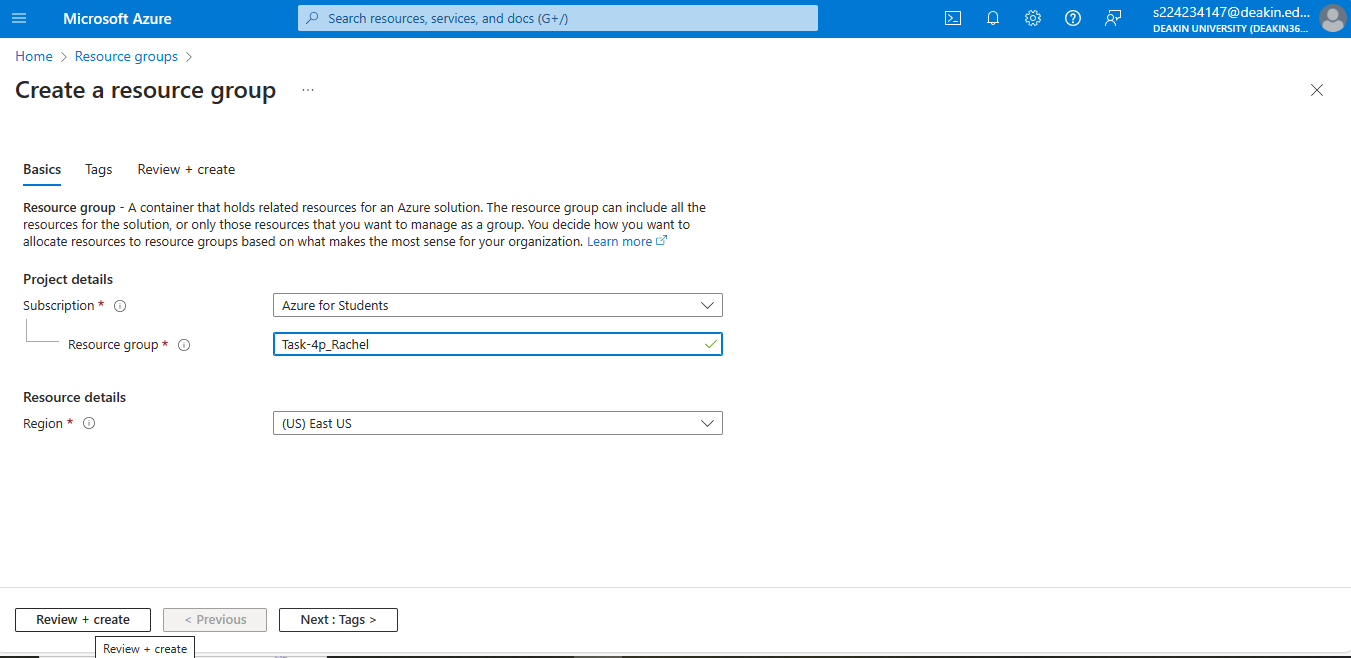

* **RESOURCE GROUP HAS BEEN CREATED**

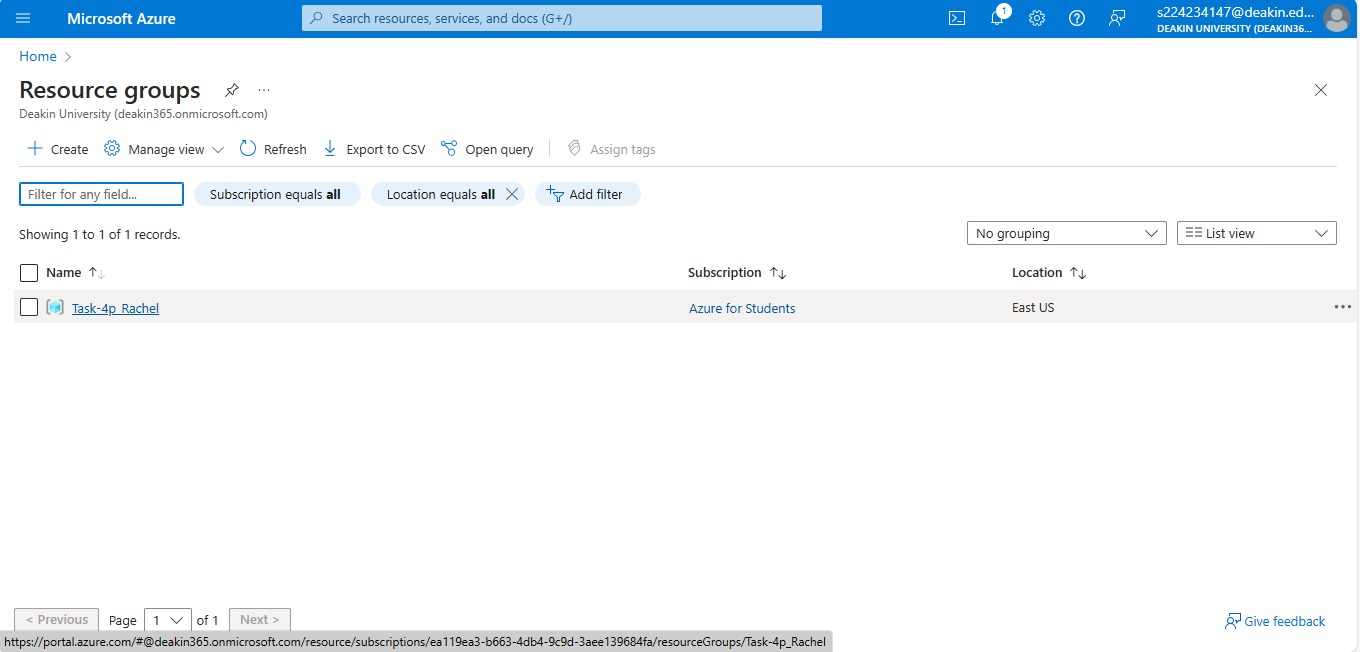

* Select *Create resources* to create *computer vision resource*.

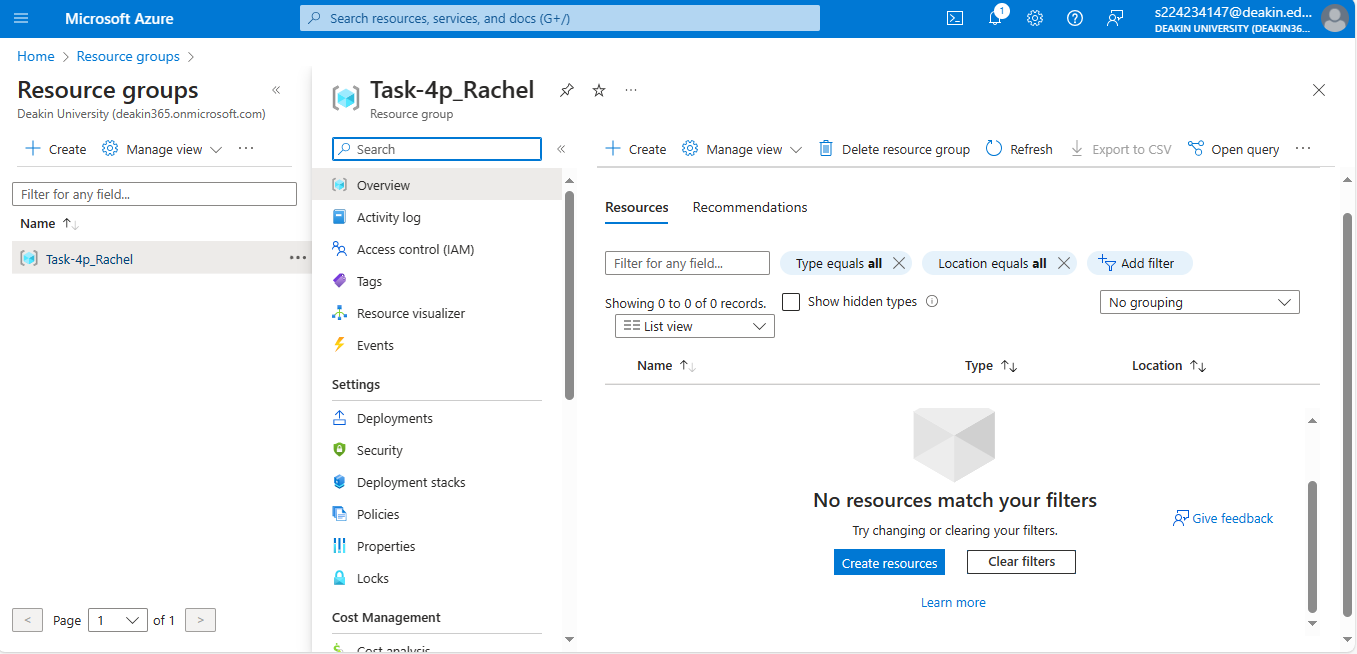

* In search tab search **Computer Vision** for creating *Computer Vision Resource*.

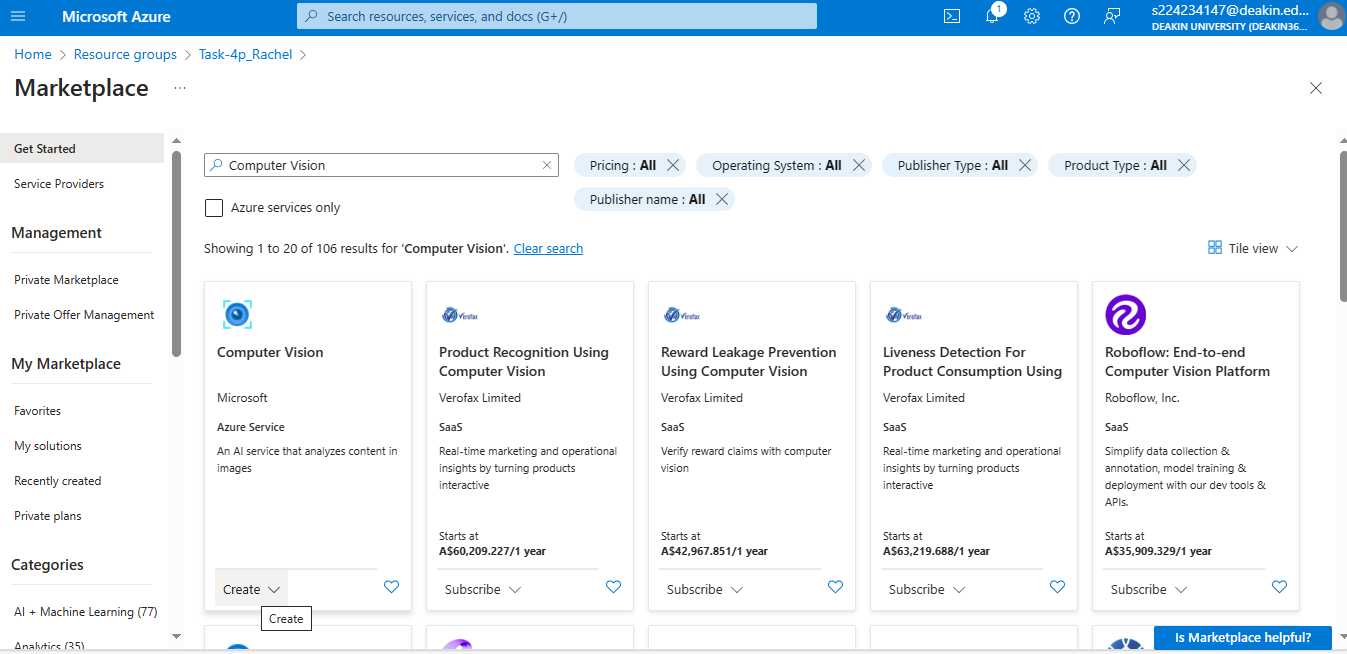

**CREATING COMPUTER VISION RESOURCE**
* In the Instance Details set **Region** same as *East US*.
* **CV Resource Name** as *"Rachel"*
* Setting **Pricing tier** as *'Free f0 (20 calls per minute, 5K calls per month)'*
* Checking the box to acknowledge all the terms above
* *Review+create* for creating **Computer Vision Resource**

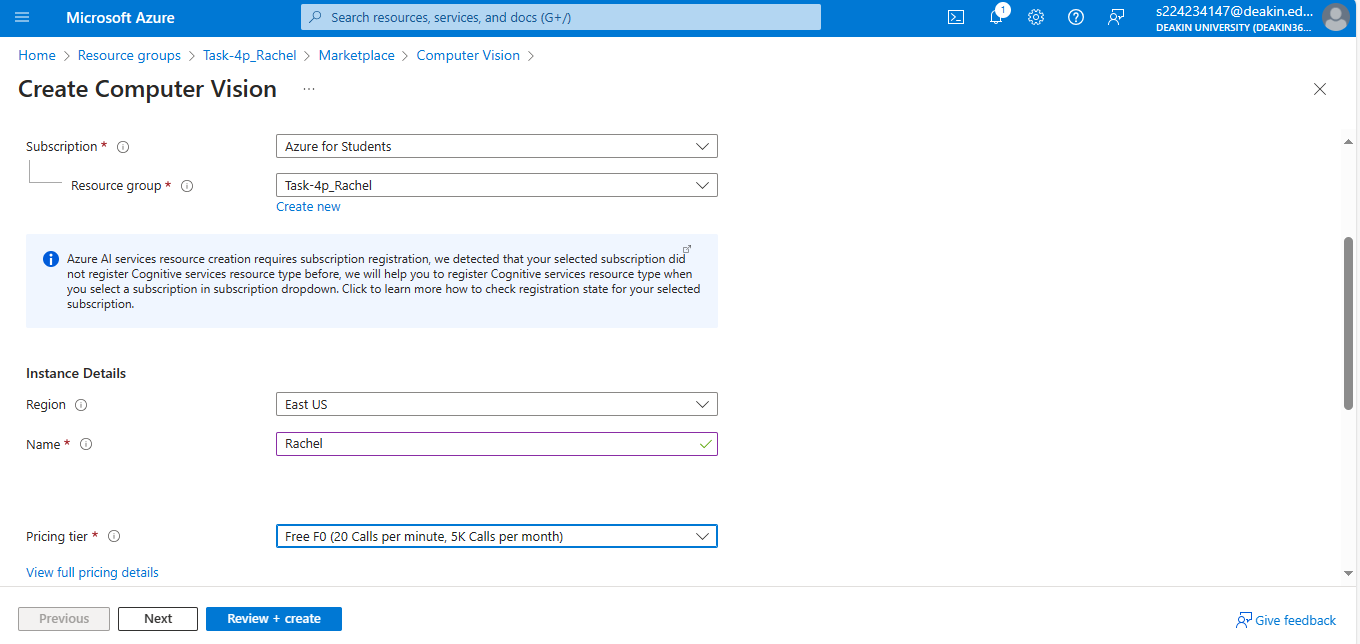

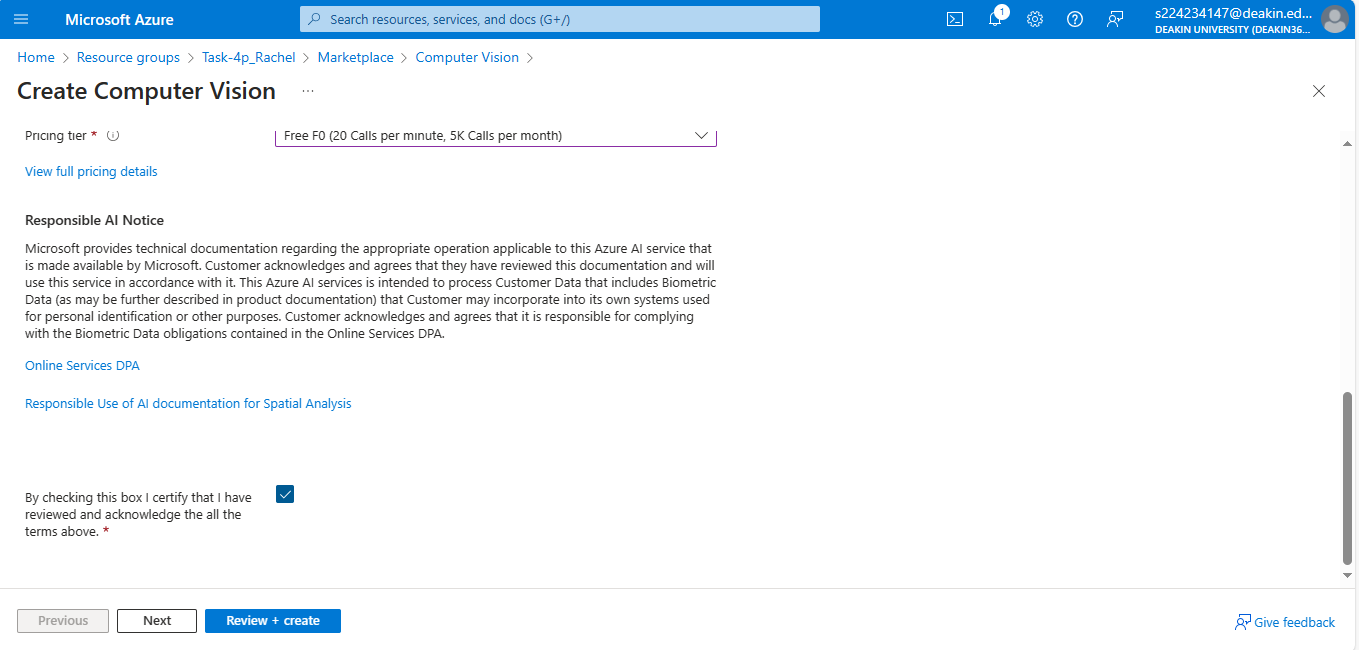

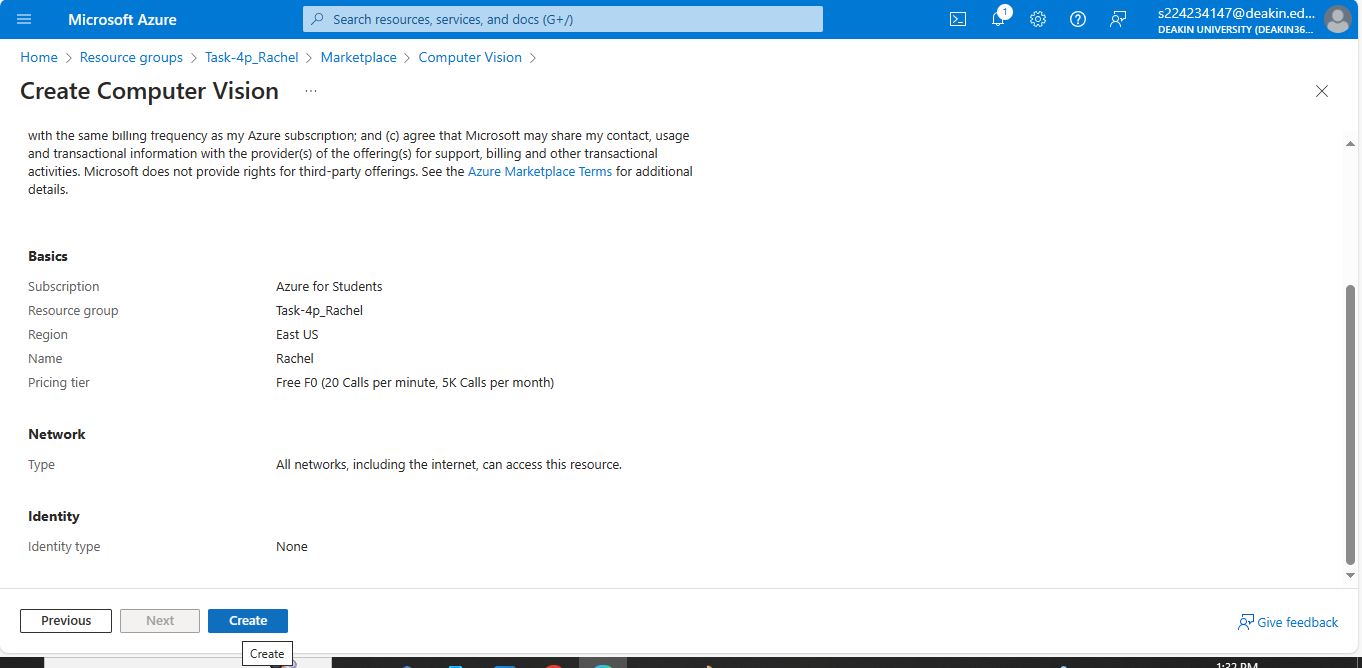

*  Deployment is complete to access the computer vision resource group

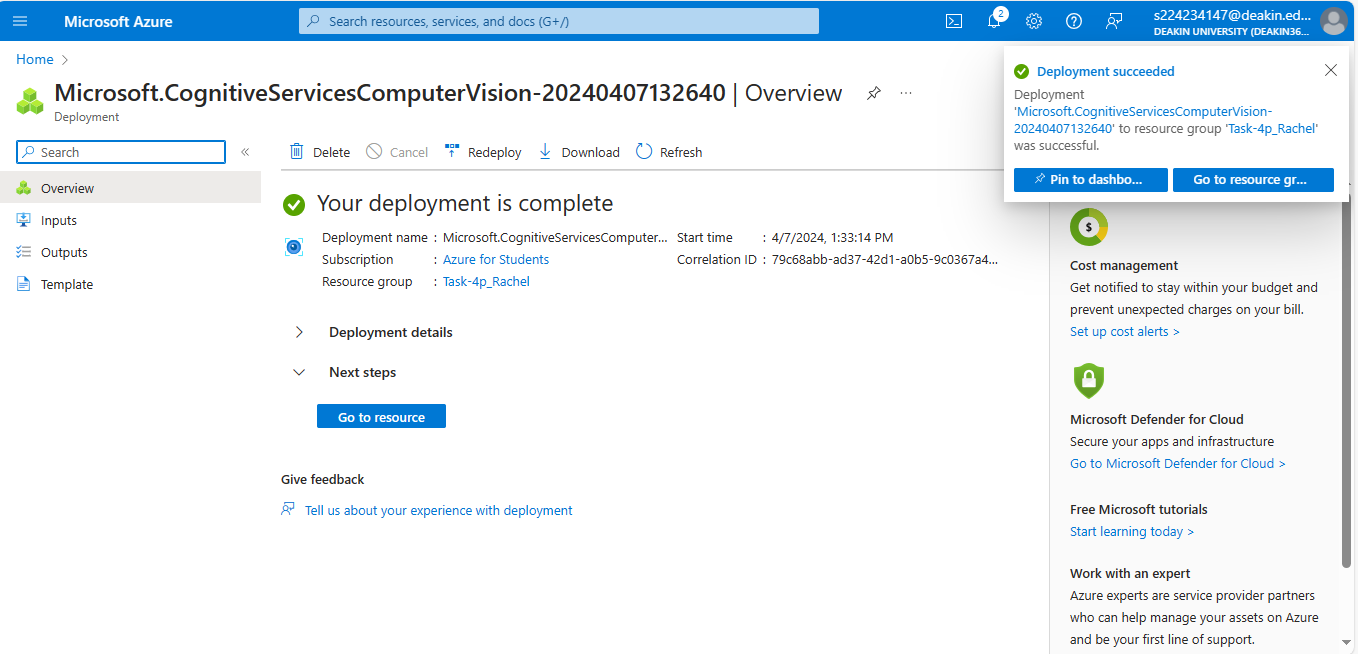

* In the *CV Resource* we get the keys and endpoint for accessing Computer Vision services in local Python Notebook.

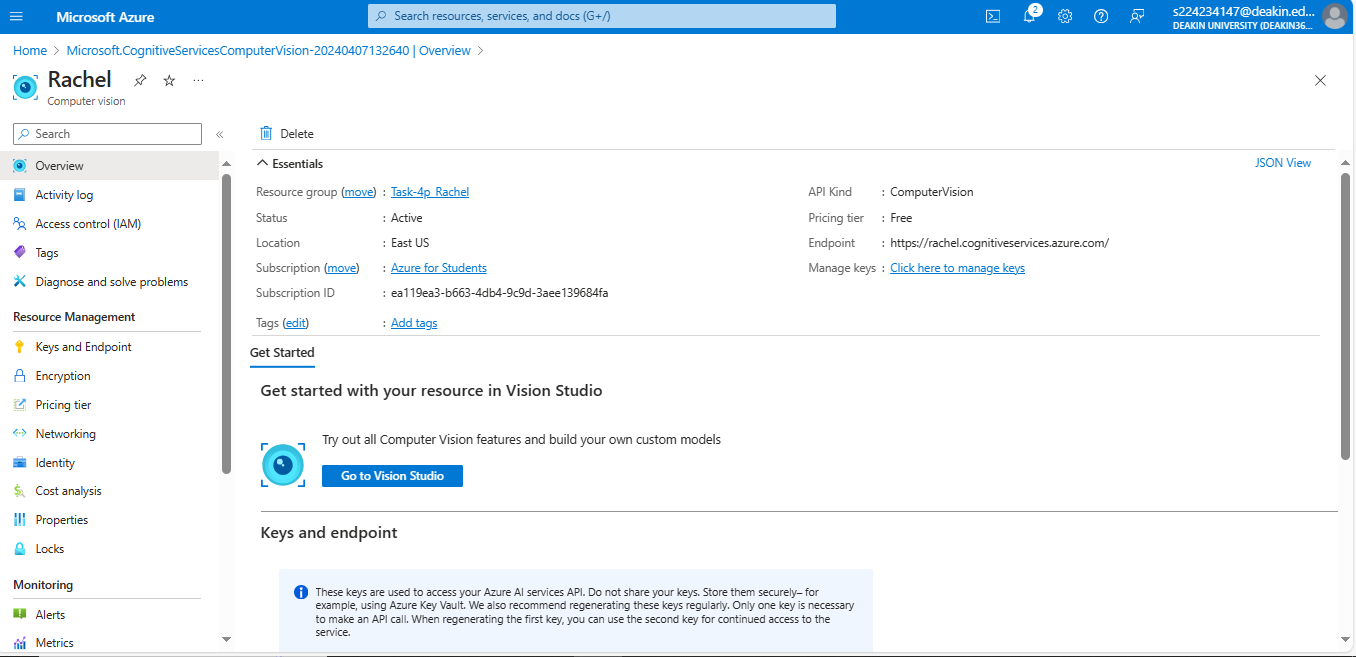

* Copy the KEY 1 as subscription key 
* Copy the endpoint 
* To connect from Jupyter as environment variables

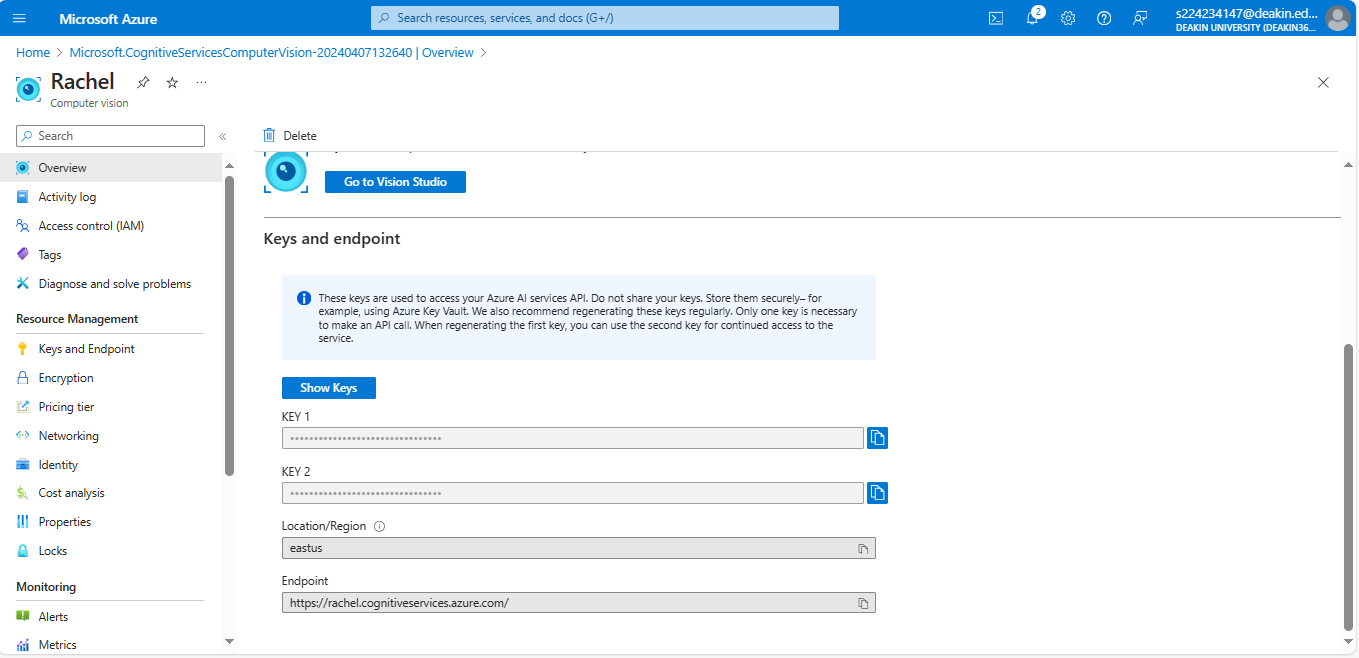

* Save the *subscription_key* and *endpoint* as **Rachel_env_T4.env** file to access the Azure Computer Vision Services from Local Jupyter Lab.

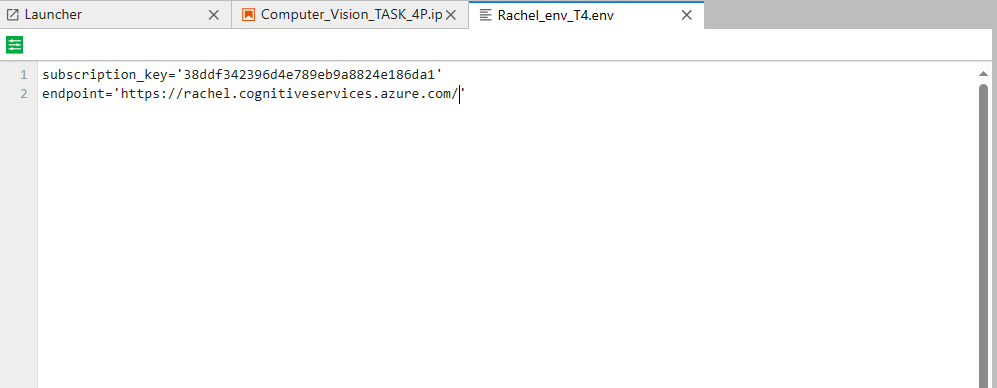

## Load the dotenv to connect the Computer Vision Services from Azure

In [4]:
# Read the environment variables to authenticate Computer Vision
load_dotenv("Rachel_env_T4.env")

subscription_key = os.environ.get("subscription_key")
endpoint = os.environ.get("endpoint")
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

## Image Analysis:

In [5]:
# from "VisualFeatureTypes" we can observe the features of description,tags,categories,brands,objects,adult for Image data
features = [VisualFeatureTypes.description,
            VisualFeatureTypes.tags,
            VisualFeatureTypes.categories,
            VisualFeatureTypes.brands,
            VisualFeatureTypes.objects,
            VisualFeatureTypes.adult]

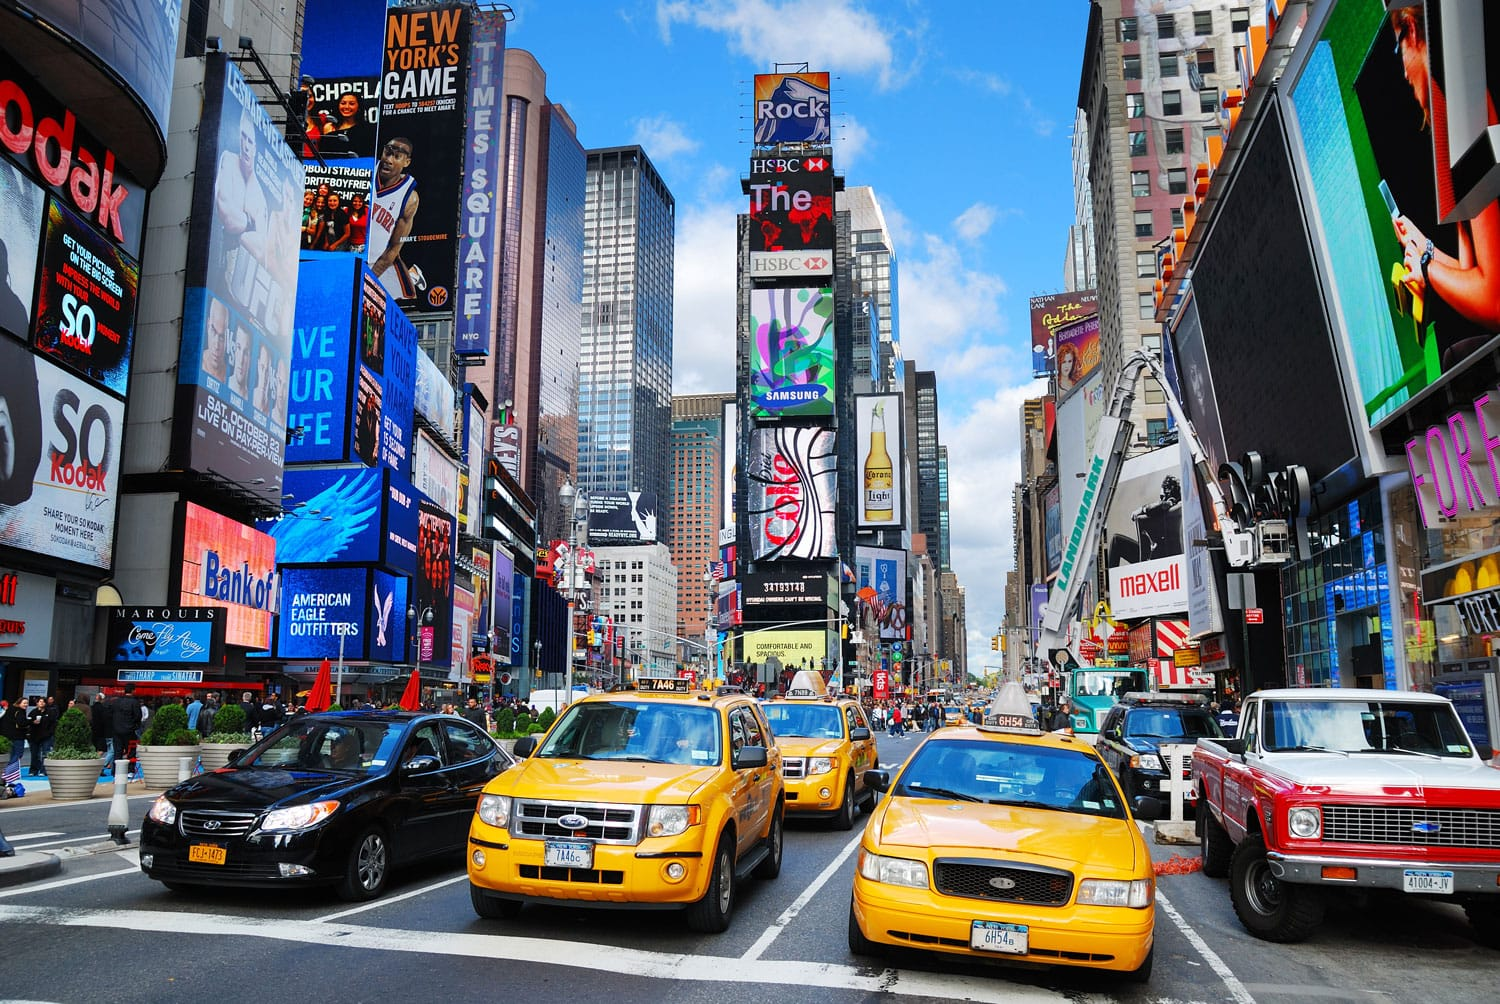

In [6]:
# Uploading the image downloaded from the browser 
image_file = 'times-square-nyc.jpg'

# Viewing the image file
img(image_file)

## ANALYSING THE ABOVE SPECIFIED FEATURES FOR THE IMAGE DATA

In [7]:
# Analyse the image
with open(image_file, mode="rb") as image_data:
    # call the API.
    # The first argument in the function is the image to be analysed. The second argument is the list of features to be extracted from this image.
    # We will run the analysis once per image. Then, we will display each feature in a new cell.
    analysis = computervision_client.analyze_image_in_stream(image_data ,features)

## Getting the Description for Image and its Confidence Interval.

    From getting the description and confidence Interval around 47% describes about the Image. 

In [8]:
if (len(analysis.description.captions) > 0):
    print("Describing the image: ")
    for caption in analysis.description.captions:
        print("Description: '{}' (confidence: {:.2f}%)".format(caption.text, caption.confidence * 100))
else:
    print('No description found.')

Describing the image: 
Description: 'a busy city street with Times Square in the background' (confidence: 46.63%)


## Getting the tags for Image and its CI.

* Through analysis.tags we get different tags that are associated with images
* Also we can get names and confidence Interval of the tags from the Image file.
* From the Confidence Interval we observe it most tags detected are above 90% which is pretty good.

In [9]:
# Get image tags
if (len(analysis.tags) > 0):
    print("These are the tags associated with the image:")
    for tag in analysis.tags:
        print(" -'{}' (confidence: {:.2f}%)".format(tag.name, tag.confidence * 100))
else:
    print("No image tags found")

These are the tags associated with the image:
 -'text' (confidence: 99.72%)
 -'outdoor' (confidence: 99.69%)
 -'vehicle' (confidence: 99.54%)
 -'land vehicle' (confidence: 99.44%)
 -'sky' (confidence: 98.53%)
 -'taxi' (confidence: 98.23%)
 -'building' (confidence: 97.90%)
 -'road' (confidence: 96.11%)
 -'street' (confidence: 95.34%)
 -'car' (confidence: 95.05%)
 -'billboard' (confidence: 94.25%)
 -'traffic' (confidence: 94.24%)
 -'wheel' (confidence: 93.80%)
 -'vehicle registration plate' (confidence: 93.60%)
 -'downtown' (confidence: 90.58%)
 -'city' (confidence: 89.81%)
 -'metropolitan area' (confidence: 89.46%)
 -'mixed-use' (confidence: 86.84%)
 -'metropolis' (confidence: 86.76%)
 -'traffic congestion' (confidence: 86.75%)
 -'urban area' (confidence: 86.45%)
 -'skyscraper' (confidence: 85.69%)
 -'crowded' (confidence: 55.05%)
 -'sign' (confidence: 54.16%)


## Getting the Image Categories and its CI

* Creating the empty list with landmarks to detect the landmark and their details from the image from analysis.categories.
* Printing the Categories and landmarks with their Confidence Interval.
* From the confidence Interval of categories it is poor in detection and detected the landmark with good CI around 92%.

In [10]:
# Get image categories
if (len(analysis.categories) > 0):
    print("Categories:")
    landmarks = []
    for category in analysis.categories:
        # Print the category
        print(" -'{}' (confidence: {:.2f}%)".format(category.name, category.score * 100))
        if category.detail:
            # Get landmarks in this category
            if category.detail.landmarks:
                for landmark in category.detail.landmarks:
                    if landmark not in landmarks:
                        landmarks.append(landmark)

    # If there were landmarks, list them
    if len(landmarks) > 0:
        print("Landmarks:")
        for landmark in landmarks:
            print(" -'{}' (confidence: {:.2f}%)".format(landmark.name, landmark.confidence * 100))
else:
    print("Unable to find image categories.")
    

Categories:
 -'others_' (confidence: 0.39%)
 -'outdoor_' (confidence: 3.12%)
Landmarks:
 -'Times Square' (confidence: 92.24%)


## Detecting the Objects of Image.
* From detecting the most of the objects when we observe the Confidence Interval with atleast 80% the model   performed better.

===== Object Detection =====
Objects in image:
 -taxi (confidence: 72.00%)
 -car (confidence: 51.90%)
 -taxi (confidence: 82.40%)
 -taxi (confidence: 88.20%)
 -car (confidence: 84.00%)
 -taxi (confidence: 85.70%)
  Results saved in objects.jpg


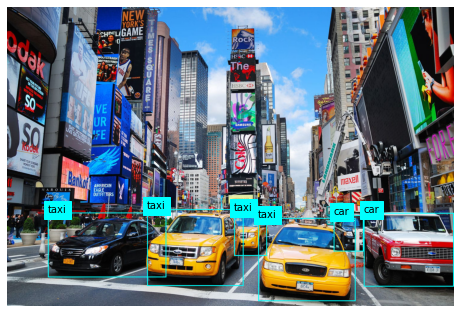

In [11]:
'''
Object Detection
This example locates objects, identifies them, and draws bounding boxes around them in a local image.
'''
print("===== Object Detection =====")
# Get objects in the image
if len(analysis.objects) > 0:
    print("Objects in image:")

    # Prepare image for drawing
    fig = plt.figure(figsize=(8, 8))
    plt.axis('off')
    image = Image.open(image_file)
    draw = ImageDraw.Draw(image)
    color = 'cyan'
    for detected_object in analysis.objects:
        # Print object name
        print(" -{} (confidence: {:.2f}%)".format(detected_object.object_property, detected_object.confidence * 100))

        # Draw object bounding box
        r = detected_object.rectangle
        bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
        draw.rectangle(bounding_box, outline=color, width=3)
        plt.annotate(detected_object.object_property,(r.x, r.y), backgroundcolor=color)
    # Save annotated image
    plt.imshow(image)

    # Save the annotated image in a new file for future reference
    outputfileobj = 'objects.jpg'
    fig.savefig(outputfileobj)
    print('  Results saved in', outputfileobj)
else:
    print('No objects found in the image.')

## Getting the Content Moderation Ratings for the Image.

* Checking the Image for Content Moderation such as Adult, Racy, Gore content.

In [12]:
'''
Content moderation
The content ratings of a local image.
'''
print("===== Content moderation =====")
# Get moderation ratings
ratings = 'Ratings:\n -Adult: {}\n -Racy: {}\n -Gore: {}'.format(analysis.adult.is_adult_content,
                                                                    analysis.adult.is_racy_content,
                                                                    analysis.adult.is_gory_content)
print(ratings)

===== Content moderation =====
Ratings:
 -Adult: False
 -Racy: False
 -Gore: False


## Detecting the brands from Image. 
* Brands are not detected but we have 'coke' brand on the image. 

In [13]:
'''
Detect brands
This example detects brands in a local image.
'''
print("===== Detect brands =====")

# Get brands in the image
if (len(analysis.brands) > 0):
    print("Brands: ")
    for brand in analysis.brands:
        print(" -'{}' (confidence: {:.2f}%)".format(brand.name, brand.confidence * 100))
else:
    print("No brands detected in image.")

===== Detect brands =====
No brands detected in image.


## Generating the thumbnail image

In [14]:
'''
Generate a thumbnail image
This example creates a thumbnail of a local image.
'''
print("===== Generate Thumbnail =====")
# Generate a thumbnail
with open(image_file, mode="rb") as image_data:
    # Get thumbnail data
    thumbnail_stream = computervision_client.generate_thumbnail_in_stream(100, 100, image_data, True)

# Save thumbnail image
thumbnail_file_name = 'thumbnail.png'
with open(thumbnail_file_name, "wb") as thumbnail_file:
    for chunk in thumbnail_stream:
        thumbnail_file.write(chunk)

print('Thumbnail saved in', thumbnail_file_name)

===== Generate Thumbnail =====
Thumbnail saved in thumbnail.png


## Detecting the colors of the Image.

In [15]:
'''
Detect Color
This example detects the different aspects of its color scheme in a local image.
'''
print("===== Detect Color =====")
# Open local image
local_image = open(image_file, "rb")
# Select visual feature(s) you want
local_image_features = ["color"]
# Call API with local image and features
detect_color_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

# Print results of the color scheme detected
print("Getting color scheme of the local image: ")
print("Is black and white: {}".format(detect_color_results_local.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_local.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_local.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_local.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_local.color.dominant_colors))
print()

===== Detect Color =====
Getting color scheme of the local image: 
Is black and white: False
Accent color: 156BB6
Dominant background color: Grey
Dominant foreground color: Black
Dominant colors: ['Grey', 'Black']



## Another Image detection

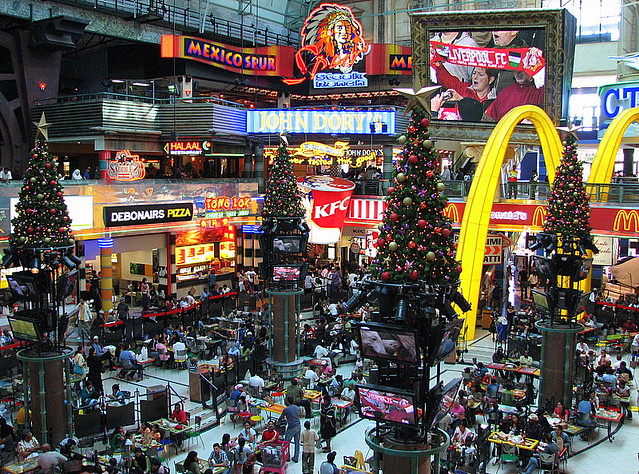

In [16]:
image_file1 = "Mall_Image.jpg"

# Viewing the image file
img(image_file1)

In [17]:
#Image Analysis
with open(image_file1, mode="rb") as image_data:
    analysis = computervision_client.analyze_image_in_stream(image_data ,features)

In [18]:
#Description of the Image
if (len(analysis.description.captions) > 0):
    print("Describing the image: ")
    for caption in analysis.description.captions:
        print("Description: '{}' (confidence: {:.2f}%)".format(caption.text, caption.confidence * 100))
else:
    print('No description found.')

Describing the image: 
Description: 'a large crowd of people in a mall' (confidence: 37.58%)


===== Object Detection =====
Objects in image:
 -Christmas tree (confidence: 55.80%)
  Results saved in objects.jpg


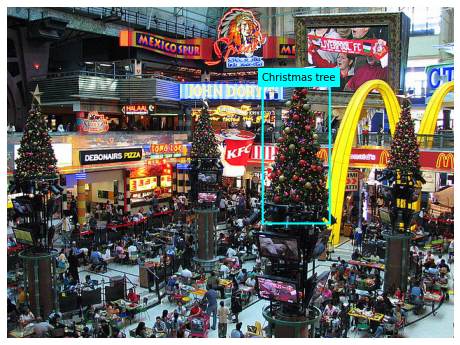

In [19]:
#Objects detection.
print("===== Object Detection =====")
# Get objects in the image
if len(analysis.objects) > 0:
    print("Objects in image:")

    # Prepare image for drawing
    fig = plt.figure(figsize=(8, 8))
    plt.axis('off')
    image = Image.open(image_file1)
    draw = ImageDraw.Draw(image)
    color = 'cyan'
    for detected_object in analysis.objects:
        # Print object name
        print(" -{} (confidence: {:.2f}%)".format(detected_object.object_property, detected_object.confidence * 100))

        # Draw object bounding box
        r = detected_object.rectangle
        bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
        draw.rectangle(bounding_box, outline=color, width=3)
        plt.annotate(detected_object.object_property,(r.x, r.y), backgroundcolor=color)
    # Save annotated image
    plt.imshow(image)

    # Save the annotated image in a new file for future reference
    outputfile = 'objects.jpg'
    fig.savefig(outputfile)
    print('  Results saved in', outputfile)
else:
    print('No objects found in the image.')

In [20]:
#Image Type Detection
'''
Detect Image Types
This example detects an image's type (clip art/line drawing).
'''
print("===== Detect Image Types =====")
# Open local image
local_image_type = open(image_file1, "rb")
# Select visual feature(s) you want
local_image_features = ["ImageType"]
# Call API with local image and features
detect_type_results_local = computervision_client.analyze_image_in_stream(local_image_type, local_image_features)

# Print type results with degree of accuracy
print("Type of local image:")
if detect_type_results_local.image_type.clip_art_type == 0:
    print("Image is not clip art.")
elif detect_type_results_local.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art.")
elif detect_type_results_local.image_type.line_drawing_type == 2:
    print("Image is normal clip art.")
else:
    print("Image is good clip art.")

if detect_type_results_local.image_type.line_drawing_type == 0:
    print("Image is not a line drawing.")
else:
    print("Image is a line drawing")

===== Detect Image Types =====
Type of local image:
Image is not clip art.
Image is not a line drawing.


In [21]:
#Feature Tagging
if (len(analysis.tags) > 0):
    print("These are the tags associated with the image:")
    for tag in analysis.tags:
        print(" -'{}' (confidence: {:.2f}%)".format(tag.name, tag.confidence * 100))
else:
    print("No image tags found")

These are the tags associated with the image:
 -'scene' (confidence: 96.49%)
 -'christmas tree' (confidence: 93.82%)
 -'building' (confidence: 91.43%)
 -'shopping mall' (confidence: 87.99%)
 -'city' (confidence: 63.48%)
 -'people' (confidence: 56.82%)
 -'street' (confidence: 56.37%)


In [22]:
#Detecting the brands
print("===== Detect brands =====")

# Get brands in the image
if (len(analysis.brands) > 0):
    print("Brands: ")
    for brand in analysis.brands:
        print(" -'{}' (confidence: {:.2f}%)".format(brand.name, brand.confidence * 100))
else:
    print("No brands detected in image.")

===== Detect brands =====
Brands: 
 -'McDonald's' (confidence: 74.60%)


===== Detect brands =====
Brands: 
 -'McDonald's' (confidence: 74.60% at location 615, 637, 211, 233)
  Results saved in brands_annotated.jpg


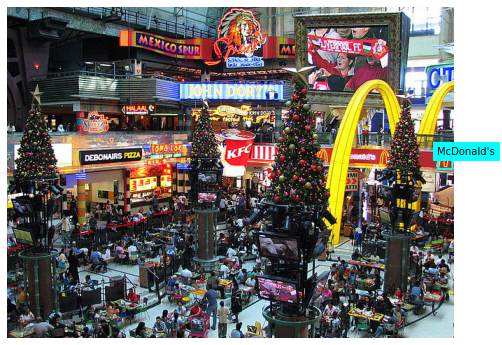

In [23]:
'''
Detect brands
This example detects brands in a local image. If any brands are found, then they are identified and a bounding box is drawn around them.
'''
print("===== Detect brands =====")
# Open local image
local_image_type = open(image_file1, "rb")
# Select visual feature(s) you want
local_image_features = ["brands"]
# Call API with local image and features
detect_type_results_local = computervision_client.analyze_image_in_stream(local_image_type, local_image_features)
# Get brands in the image
if (len(detect_type_results_local.brands) > 0):
    print("Brands: ")

    fig = plt.figure(figsize=(8, 8))
    plt.axis('off')
    image = Image.open(image_file1)
    draw = ImageDraw.Draw(image)
    color = 'cyan'
    for brand in detect_type_results_local.brands:
       # Prepare image for drawing
        print(" -'{}' (confidence: {:.2f}% at location {}, {}, {}, {})".format(brand.name, \
        brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))
        # Draw object bounding box
        r =  brand.rectangle
        bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
        draw.rectangle(bounding_box, outline=color, width=3)
        plt.annotate(brand.name,(r.x, r.y), backgroundcolor=color)
    # Save annotated image
    plt.imshow(image)

    # Save the annotated image in a new file for future reference
    outputfilebrand = 'brands_annotated.jpg'
    fig.savefig(outputfilebrand)
    print('  Results saved in', outputfilebrand)
else:
  print("No brands detected.")


* In this Image file McDonald's brand has been detected.
* Despite McDonald's there is KFC brand which is not detected. 
* We could use better pre_trained model to predict or Detect the images with CI around atleast 80%  

## DELETING THE RESOURCE GROUP

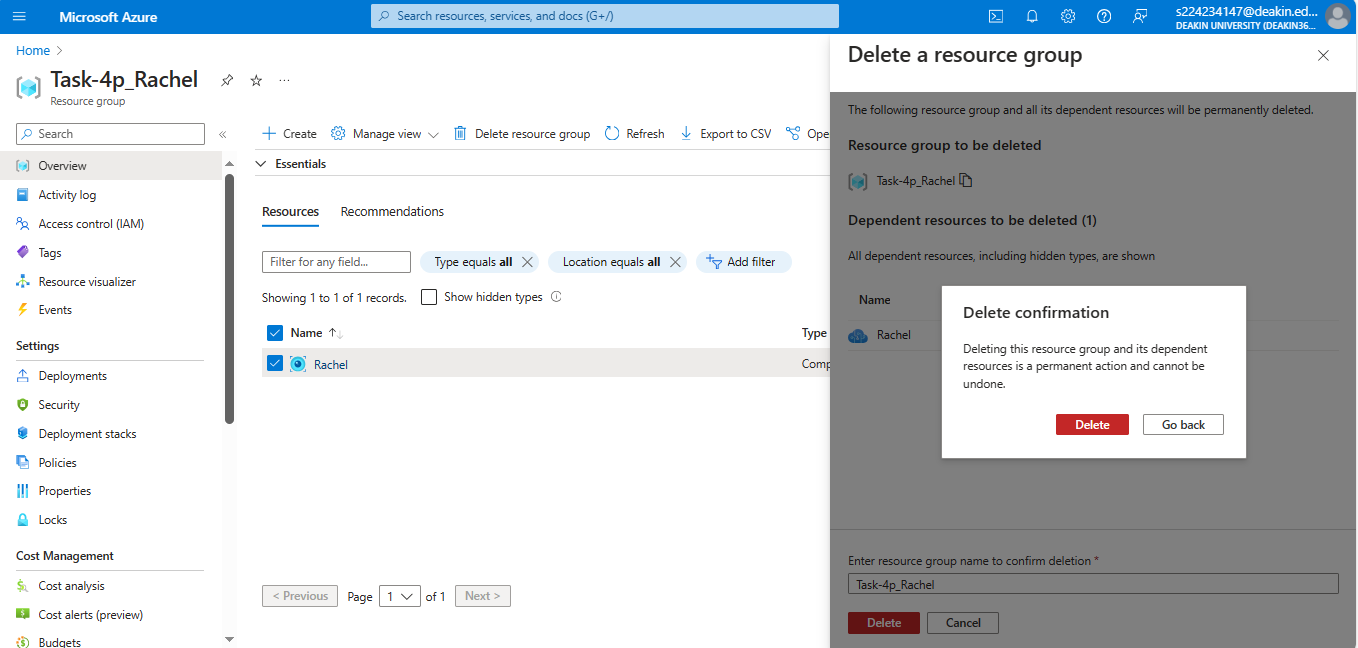

# REFERENCES

1) wwlpublish (n.d.). Microsoft Azure AI Fundamentals: Computer Vision - Training. learn.microsoft.com. Available at: https://learn.microsoft.com/en-us/training/paths/explore-computer-vision-microsoft-azure/.

‌